In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel('fully_data.xlsx')
print(df.shape)
df.head()

(123, 38)


,Название фильма,GoodReviewVoteCount,FilmCritics,MPAA,ratingKinopoisk,year,Length,AgeLimits,countries,criminal,...,anime,vestern,reliase date,sequel,star_power,SJW,weekend,season,box_office,budget
0,John Wick: Chapter 4,67,8.2,r,7.6,2023,169,age18,"США, Германия",1,...,0,0,24.03.23,1,0,0,0,0,440180275,90000000
1,Oppenheimer,113,8.6,r,8.1,2023,180,NaN,"США, Великобритания",0,...,0,0,21.07.23,0,7,0,0,1,975811333,100000000
2,Barbie,61,8.0,pg13,6.6,2023,114,age18,"США, Великобритания",0,...,0,0,21.07.23,0,0,1,0,1,1447038421,100000000
3,Civil War,35,7.5,r,6.3,2023,109,age18,"США, Великобритания, Финляндия",0,...,0,0,12.04.24,0,1,0,0,0,127337886,50000000
4,Guardians of the Galaxy Vol. 3,74,7.2,pg13,8.1,2023,150,NaN,"США, Франция, Канада, Новая Зеландия",0,...,0,0,05.05.23,1,0,1,0,0,845555777,250000000


In [ ]:
# Удаляем строки, где есть хотя бы одно NaN значение в выбранных столбцах
df = df.dropna(subset=[
    'budget',
    'FilmCritics',
    'star_power',
    'sequel',
    'season',
    'weekend',
    'box_office',
    'ratingKinopoisk'
])

# 1. Описательные статистики

In [ ]:
df.describe()

,GoodReviewVoteCount,FilmCritics,ratingKinopoisk,year,Length,criminal,horror,adventure,detective,melodrama,...,music,anime,vestern,sequel,star_power,SJW,weekend,season,box_office,budget
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02
mean,15.766667,6.259167,6.488333,2023.475000,118.183333,0.100000,0.208333,0.308333,0.058333,0.100000,...,0.008333,0.008333,0.008333,0.375000,0.350000,0.250000,0.016667,0.383333,2.610073e+08,8.815833e+07
std,18.579709,1.205415,0.768627,0.501468,24.040576,0.301258,0.407819,0.463741,0.235355,0.301258,...,0.091287,0.091287,0.091287,0.486153,1.135005,0.434828,0.128556,0.488237,3.270781e+08,7.659958e+07
min,0.000000,3.300000,4.400000,2023.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.941050e+05,2.000000e+06
25%,4.000000,5.575000,6.000000,2023.000000,101.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.368779e+07,2.612500e+07
50%,9.500000,6.200000,6.500000,2023.000000,111.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300982e+08,6.850000e+07
75%,18.000000,7.000000,7.000000,2024.000000,130.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.000000,1.000000,3.873168e+08,1.250000e+08
max,113.000000,9.100000,8.400000,2024.000000,206.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.698864e+09,3.400000e+08


In [ ]:
# Подсчет строк с 2023 годом
count_2023 = len(df[df['year'] == 2023])
print(f"Количество данных за 2023 год: {count_2023}")

Количество данных за 2023 год: 63


In [ ]:
count_SJW = len(df[df['SJW'] == 1])
print(f" {count_SJW}")

 30


In [ ]:
count_season = len(df[df['season'] == 1])
print(f" {count_season}")

 46


In [ ]:
count_weekend = len(df[df['weekend'] == 1])
print(f" {count_weekend}")

 2


In [ ]:
count_sequel = len(df[df['sequel'] == 1])
print(f" {count_sequel}")

 45


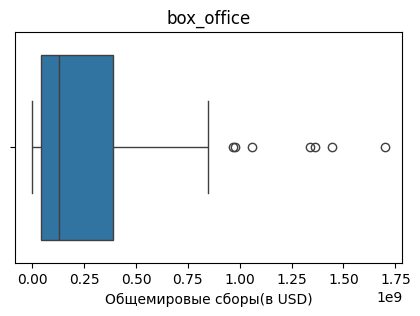

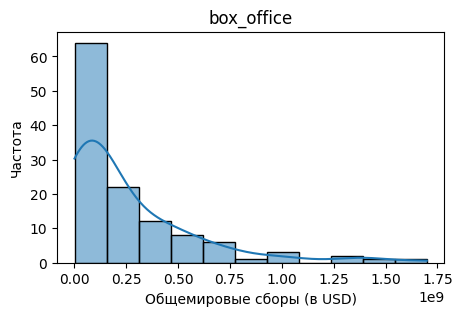

In [ ]:
#Кассовые сборы
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='box_office')
plt.title('box_office')
plt.xlabel('Общемировые сборы(в USD)')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(df['box_office'], kde=True, bins=11)
plt.title('box_office')
plt.xlabel('Общемировые сборы (в USD)')
plt.ylabel('Частота')
plt.show()

In [ ]:
print(8.815833e+07)

88158330.0


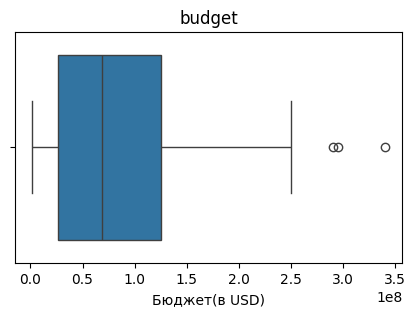

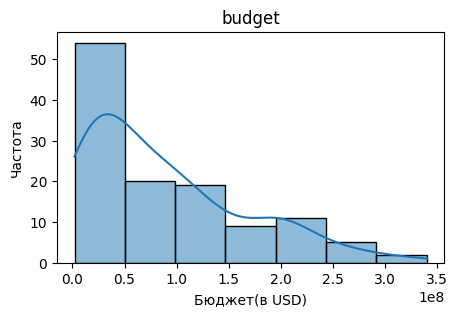

In [ ]:
#Бюджет
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='budget')
plt.title('budget')
plt.xlabel('Бюджет(в USD)')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(df['budget'], kde=True, bins=7)
plt.title('budget')
plt.xlabel('Бюджет(в USD)')
plt.ylabel('Частота')
plt.show()

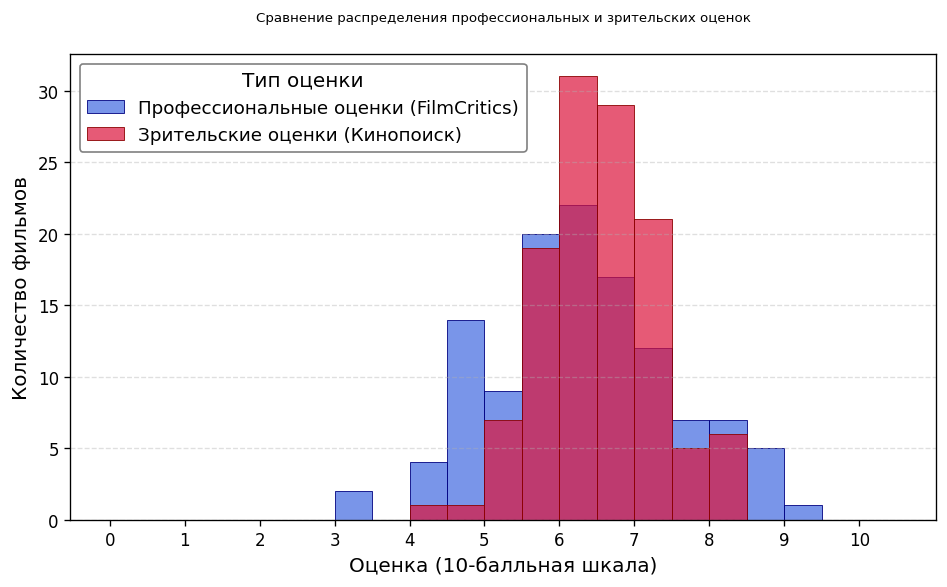

In [ ]:
# Создание фигуры
plt.figure(figsize=(8, 5), dpi=120)

# Построение гистограмм с прозрачностью
sns.histplot(df['FilmCritics'],
             bins=np.arange(0, 11, 0.5),
             color='royalblue',
             alpha=0.7,
             label='Профессиональные оценки (FilmCritics)',
             edgecolor='navy',
             linewidth=0.5)

sns.histplot(df['ratingKinopoisk'],
             bins=np.arange(0, 11, 0.5),
             color='crimson',
             alpha=0.7,
             label='Зрительские оценки (Кинопоиск)',
             edgecolor='darkred',
             linewidth=0.5)

# Оформление
plt.title('Сравнение распределения профессиональных и зрительских оценок',
          fontsize=8, pad=20)
plt.xlabel('Оценка (10-балльная шкала)', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.xticks(np.arange(0, 11, 1))
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Легенда
plt.legend(frameon=True,
           facecolor='white',
           framealpha=1,
           edgecolor='gray',
           title='Тип оценки',
           title_fontsize=12,
           fontsize=11)

# Улучшение отступов
plt.tight_layout()
plt.show()

In [ ]:
#Удаление выбросов

def remove_outliers(df, columns=None, threshold=1.5):
    """
    Удаляет выбросы по заданным столбцам с помощью IQR метода

    Параметры:
        df: DataFrame с данными
        columns: Список столбцов для обработки (по умолчанию все числовые)
        threshold: Коэффициент для определения границ выбросов (обычно 1.5-3)

    Возвращает:
        Очищенный DataFrame
    """
    # Выбираем числовые столбцы, если не заданы явно
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    # Создаем маску для фильтрации
    mask = pd.Series(True, index=df.index)

    for col in columns:
        if col in df.columns:
            # Вычисляем квартили и IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Определяем границы
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Обновляем маску
            mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

    print(f"Удалено {len(df) - sum(mask)} выбросов ({((1 - sum(mask)/len(df))*100):.1f}% данных)")
    return df[mask].copy()

# Применение
df_clean = remove_outliers(df, columns=['box_office', 'budget', 'Length'], threshold=1.5)

Удалено 14 выбросов (11.7% данных)


# 2. Построение линейной регрессии (из статьи)

### 2.1 Построим модель, описанную в статье.

То есть линейную регрессию на кассовые сборы от производственных затрат, зрительских и профессиональных оценок, возрастного рейтинга, звездности фильма, его жанра даты выпуска и того является ли он сиквелом.

Так как в оригинальной работе для жанра использовалась одна дамми-переменная, которая равнялась 0, если жанром была драма и 1 в остальных случаях, то было принято решение протестировать несколько регрессий для разных конфигураций переменных

In [ ]:
#Преобразуем категориальные переменные в числовые
df_clean['R'] = (df_clean['MPAA'] != 'G').astype(int)

Заметим, что в данных отсутсвуют фильмы, для которых рейтинг бы являлся G, поэтому данная переменная будет лишь константой в модели, поэтому было принято решение ее исключить. Так же в связи с тем, что всего лишь 2 фильма были выпущены в праздничные дни, переменная weekend не будет значимой и не даст правильно оценить оставшиеся факторы.

In [ ]:
#Оригинальная модель
X = df_clean[['budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season']]
y = df_clean['box_office']

# Преобразуем все данные в числовой формат (на всякий случай)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     4.998
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000166
Time:                        16:26:04   Log-Likelihood:                -2125.2
No. Observations:                 106   AIC:                             4266.
Df Residuals:                      98   BIC:                             4288.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.637e+08   8.24e+07     -3.202   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '


Использование робастных ошибок в форме Уайта решает проблему гетероскедастичности, проверим другие предпосылки теоремы Гауса-Маркова. Судя по показателям Jarque-Bera (JB): ошибки в модели распределены не нормально.

In [ ]:
# Поиск выбросов
# 1. Стюдентизированные остатки
influence = model.get_influence()
inf_sum = influence.summary_frame()

outliers = inf_sum[inf_sum['student_resid'] > 3]
outliers_index = outliers.index
print(outliers_index)

Index([], dtype='int64')


In [ ]:
# 2. Точки левериджа
leverage = influence.hat_matrix_diag
cutoff_leverage = (2*8)/116 # Определим пороговое значение для точек левериджа: 2*k/n
high_leverage = pd.DataFrame(([abs(leverage) > cutoff_leverage])).T
high_leverage = leverage > cutoff_leverage

Как можно заметить, в модели присутсвуют выбросы, которые могут влиять на нормальность остатков.

In [ ]:
# Рассчет VIF для проверки мультиколениарности
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:\n", vif_data)

VIF:
         feature        VIF
0         const  33.236743
1        budget   1.532859
2   FilmCritics   1.052787
3    star_power   1.241374
4  action movie   1.330798
5        comedy   1.089834
6        sequel   1.265161
7        season   1.056446


Мультиколлениарности в модели не обнаружено. Завышение Cond. No. происходит из-за разной размерности показателей, так оценки критиков ограничиваются 10, а бюджет измеряется миллионами. Заметим, что при переходе от долларов к миллионам коэффициенты в модели и их значимость не изменятся, поэтому переход осуществляться не будет.

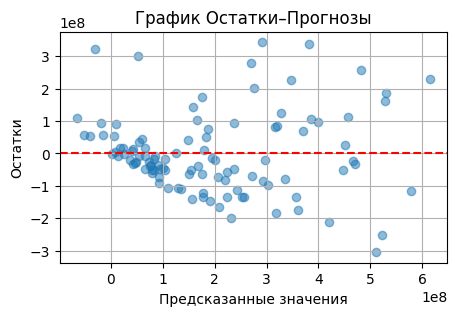

In [ ]:
#Распределние остатков
df['fitted'] = model.fittedvalues
df['residuals'] = model.resid
plt.figure(figsize=(5, 3))
plt.scatter(df['fitted'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График Остатки–Прогнозы')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

График указывает на ненормальность распределения остатков в модели.

### 2.2 Попробуем добиться нормальности остатков в этой модели.

In [ ]:
# Создаем чистый датафрейм без выбросов
df_clean = df_clean[~high_leverage].copy()

# Пересчитываем модель на очищенных данных
X_clean = df_clean[['budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season']]
X_clean = sm.add_constant(X_clean)
y_clean = df_clean['box_office']

model_clean = sm.OLS(y_clean, X_clean).fit(cov_type='HC3')
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     5.262
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000103
Time:                        16:26:05   Log-Likelihood:                -2042.3
No. Observations:                 102   AIC:                             4101.
Df Residuals:                      94   BIC:                             4122.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.297e+08   7.89e+07     -2.911   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [ ]:
print(3.811e+07)

38110000.0


Удаление выбросов не привело к нормальным остаткам, поэтому попробуем изменить функциональную форму модели.


In [ ]:
# Логарифмирование переменных
df_clean['log_box_office'] = np.log1p(df_clean['box_office'])
df_clean['log_budget'] = np.log1p(df_clean['budget'])

In [ ]:
#1. Полулогарифмическая модель.
X = df_clean[['budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season']]
X = sm.add_constant(X)
y = df_clean['log_box_office']

model_semilog = sm.OLS(y, X).fit(cov_type='HC3')
print(model_semilog.summary())

                            OLS Regression Results                            
Dep. Variable:         log_box_office   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.536
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.01e-05
Time:                        16:26:05   Log-Likelihood:                -137.80
No. Observations:                 102   AIC:                             291.6
Df Residuals:                      94   BIC:                             312.6
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.5339      0.645     24.070   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '


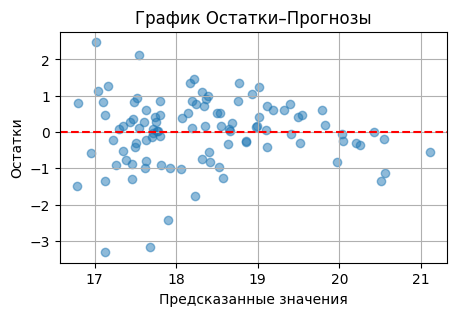

In [ ]:
#Распределние остатков
df['fitted'] = model_semilog.fittedvalues
df['residuals'] = model_semilog.resid
plt.figure(figsize=(5, 3))
plt.scatter(df['fitted'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График Остатки–Прогнозы')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

In [ ]:
#2. Логарифмическая модель.
X = df_clean[['log_budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season']]
X = sm.add_constant(X)
y = df_clean['log_box_office']

model_log = sm.OLS(y, X).fit(cov_type='HC3')
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_box_office   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     20.58
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.59e-16
Time:                        16:26:05   Log-Likelihood:                -132.94
No. Observations:                 102   AIC:                             281.9
Df Residuals:                      94   BIC:                             302.9
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0189      2.547      0.793   

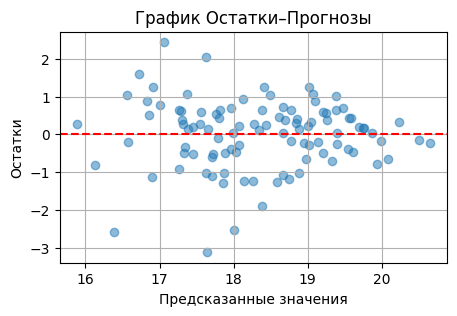

In [ ]:
#Распределние остатков
df['fitted'] = model_log.fittedvalues
df['residuals'] = model_log.resid
plt.figure(figsize=(5, 3))
plt.scatter(df['fitted'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График Остатки–Прогнозы')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

Для улучшения нормальности попробуем удалить несколько влиятельных выбросов.

In [ ]:
# Поиск выбросов
# 1. Стюдентизированные остатки
influence = model_log.get_influence()
inf_sum = influence.summary_frame()

outliers = inf_sum[inf_sum['student_resid'] > 3]
outliers_index = outliers.index
print(outliers_index)

Index([], dtype='int64')


Так как остатки близки к нормальным и выборка довольно большая, то по ЦПТ можно сказать, что в пределе они близятся к нормальным и нет смысла в их дальнейшем онормировании.

Сравним логарифмическую и линейную модели.

In [ ]:
#PE-тест Дэвидсона-Маккинона
model_lin = model_clean
model_log = model_log
df_clean['action'] = df_clean['action movie']

# Вспомогательные регрессии
df_clean['lin'] = np.log(model_lin.fittedvalues) - model_log.fittedvalues
df_clean['log'] = model_lin.fittedvalues - np.exp(model_log.fittedvalues)


model_lin_add = smf.ols('box_office ~ budget + FilmCritics + star_power +action + comedy + sequel + season + lin', data = df_clean).fit()
model_log_add = smf.ols('log_box_office ~ log_budget + FilmCritics + star_power + action + comedy + sequel + season + log', data = df_clean).fit()

print(model_lin_add.summary())
print(model_log_add.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     21.15
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.54e-17
Time:                        16:26:05   Log-Likelihood:                -1937.1
No. Observations:                  97   AIC:                             3892.
Df Residuals:                      88   BIC:                             3915.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.278e+08   7.62e+07     -4.304      

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 2.3 Оценка второй модели из статьи.

In [ ]:
#Включение Interaction Variable
df_clean['B*C'] = df_clean['budget'] * df_clean['FilmCritics']

In [ ]:
# МНК оценка с включеной переменной
X_BC = df_clean[['budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season', 'B*C']]
y = df_clean['box_office']

X_BC = sm.add_constant(X_BC)
model_BC = sm.OLS(y, X_BC).fit(cov_type='HC3')
print(model_BC.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     5.321
Date:                Thu, 08 May 2025   Prob (F-statistic):           9.33e-05
Time:                        16:26:05   Log-Likelihood:                -2034.1
No. Observations:                 102   AIC:                             4086.
Df Residuals:                      93   BIC:                             4110.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.285e+07   7.85e+07      0.801   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_BC.columns  # X — матрица предикторов
vif_data["VIF"] = [variance_inflation_factor(X_BC.values, i) for i in range(X_BC.shape[1])]
print(vif_data)

       Variable        VIF
0         const  73.375614
1        budget  36.347038
2   FilmCritics   2.498011
3    star_power   1.138040
4  action movie   1.353380
5        comedy   1.094738
6        sequel   1.312286
7        season   1.078704
8           B*C  36.505607


Так как замечена сильная мультиколеениарность, то необходимо сначала центрировать данные

In [ ]:
df_clean['budget_centered'] = df_clean['budget'] - df_clean['budget'].mean()
df_clean['FilmCritics_centered'] = df_clean['FilmCritics'] - df_clean['FilmCritics'].mean()
df_clean['B*C_2'] = df_clean['budget_centered'] * df_clean['FilmCritics_centered']

In [ ]:
# МНК оценка с включеной переменной
X_BC = df_clean[['budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season', 'B*C_2']]
y = df_clean['box_office']

X_BC = sm.add_constant(X_BC)
model_BC = sm.OLS(y, X_BC).fit(cov_type='HC3')
print(model_BC.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     9.337
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.25e-08
Time:                        16:26:05   Log-Likelihood:                -2034.1
No. Observations:                 102   AIC:                             4086.
Df Residuals:                      93   BIC:                             4110.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -2.63e+08   6.52e+07     -4.035   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_BC.columns  # X — матрица предикторов
vif_data["VIF"] = [variance_inflation_factor(X_BC.values, i) for i in range(X_BC.shape[1])]
print(vif_data)

       Variable        VIF
0         const  33.727175
1        budget   1.549644
2   FilmCritics   1.037804
3    star_power   1.138040
4  action movie   1.353380
5        comedy   1.094738
6        sequel   1.312286
7        season   1.078704
8         B*C_2   1.035427


Теперь мультиколениарности нет, попробуем уменьшить ненормальность остатков с помощью преобразования Бокса-Кокса.

In [ ]:
from scipy.stats import boxcox
df_clean['box_office_bc'], _ = boxcox(df_clean['box_office'] + 1)

X = df_clean[['budget', 'FilmCritics', 'star_power', 'action movie', 'comedy', 'sequel', 'season', 'B*C_2']]
X = sm.add_constant(X)
y = df_clean['box_office_bc']
model_bcx = sm.OLS(y, X).fit(cov_type='HC3')
print(model_bcx.summary())

                            OLS Regression Results                            
Dep. Variable:          box_office_bc   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     6.859
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.75e-06
Time:                        16:26:05   Log-Likelihood:                -481.64
No. Observations:                 102   AIC:                             981.3
Df Residuals:                      93   BIC:                             1005.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           77.4818     18.968      4.085   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 6
  warnings.warn('covariance of constraints does not have full '


### 2.4 Оценка МНК модели с включением дополнительних факторов.

При построении этой регрессии было принято решение включить зрительскую оценку, дамми-переменную на инклюзивность кинолент и некоторые жанры, которые были упомянуты в статье. В дальнейшем будет оценено несколько моделей для выбора наилучшей.

In [ ]:
#Обычная МНК модель
X_our = df_clean[['budget', 'FilmCritics', 'ratingKinopoisk', 'Length', 'sequel', 'season', 'SJW','star_power', 'action movie', 'comedy', 'drama']]
y_our = df_clean['box_office']
X_our = sm.add_constant(X_our)

model_our_1 = sm.OLS(y_our, X_our).fit(cov_type='HC3')
print(model_our_1.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4.558
Date:                Thu, 08 May 2025   Prob (F-statistic):           3.18e-05
Time:                        16:26:05   Log-Likelihood:                -2036.1
No. Observations:                 102   AIC:                             4096.
Df Residuals:                      90   BIC:                             4128.
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.794e+08   1.49e+08     

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Рассчет VIF для проверки мультиколениарности
vif_data = pd.DataFrame()
vif_data["feature"] = X_our.columns
vif_data["VIF"] = [variance_inflation_factor(X_our.values, i) for i in range(X_our.shape[1])]

print("VIF:\n", vif_data)

VIF:
             feature         VIF
0             const  103.163222
1            budget    2.117422
2       FilmCritics    1.802586
3   ratingKinopoisk    1.772080
4            Length    1.746879
5            sequel    1.453559
6            season    1.082805
7               SJW    1.270107
8        star_power    1.264042
9      action movie    1.403358
10           comedy    1.273955
11            drama    1.389196


Мультиколениарности не обнаружено

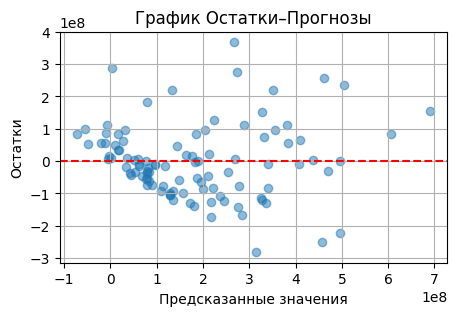

In [ ]:
#Распределние остатков
df_clean['fitted'] = model_our_1.fittedvalues
df_clean['residuals'] = model_our_1.resid

plt.figure(figsize=(5, 3))
plt.scatter(df_clean['fitted'], df_clean['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График Остатки–Прогнозы')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid()
plt.show()

Судя по графику в модели есть ненормальные остатки, с которыми необходимо бороться (это подтверждается и значениями Jarque-Bera (JB)). Поэтому попробуем прологарифмировать сначала кассовые сборы, а потом кассовые сборы и бюджет.

In [ ]:
# Поиск выбросов
# 1. Стюдентизированные остатки
influence = model_our_1.get_influence()
inf_sum = influence.summary_frame()

outliers = inf_sum[inf_sum['student_resid'] > 3]
outliers_index = outliers.index
print(outliers_index)

Index([11], dtype='int64')


In [ ]:
outliers = [11]  # явно задаем индексы для удаления
df_clean = df_clean.drop(outliers)

In [ ]:
#1. Полулогарифмическая модель.
X = df_clean[['budget', 'FilmCritics', 'ratingKinopoisk', 'Length', 'sequel', 'season', 'SJW','star_power', 'action movie', 'comedy', 'drama']]
X = sm.add_constant(X)
y = df_clean['log_box_office']

model_semilog = sm.OLS(y, X).fit(cov_type='HC3')
print(model_semilog.summary())

                            OLS Regression Results                            
Dep. Variable:         log_box_office   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     5.142
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.58e-06
Time:                        16:26:06   Log-Likelihood:                -133.31
No. Observations:                 101   AIC:                             290.6
Df Residuals:                      89   BIC:                             322.0
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.4953      1.101     

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [ ]:
#2. Логарифмическая модель.
X = df_clean[['log_budget', 'FilmCritics', 'ratingKinopoisk', 'Length', 'sequel', 'season', 'SJW','star_power', 'action movie', 'comedy', 'drama']]
X = sm.add_constant(X)
y = df_clean['log_box_office']

model_log = sm.OLS(y, X).fit(cov_type='HC3')
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_box_office   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     15.20
Date:                Thu, 08 May 2025   Prob (F-statistic):           3.75e-16
Time:                        16:26:06   Log-Likelihood:                -128.56
No. Observations:                 101   AIC:                             281.1
Df Residuals:                      89   BIC:                             312.5
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.7206      2.728     

In [ ]:
np.exp(1.0878)-1

np.float64(1.9677378620712394)

In [ ]:
#PE-тест Дэвидсона-Маккинона
model_lin = model_our_1
model_log = model_log
df_clean['action'] = df_clean['action movie']

# Вспомогательные регрессии
df_clean['lin'] = np.log(model_lin.fittedvalues) - model_log.fittedvalues
df_clean['log'] = model_lin.fittedvalues - np.exp(model_log.fittedvalues)


model_lin_add = smf.ols('box_office ~ budget + FilmCritics + Length +sequel + season + SJW + star_power + action+ comedy + drama + lin', data = df_clean).fit()
model_log_add = smf.ols('log_box_office ~ log_budget + FilmCritics + Length +sequel + season + SJW + star_power + action+ comedy + drama + log', data = df_clean).fit()

print(model_lin_add.summary())
print(model_log_add.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     13.84
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.04e-14
Time:                        16:26:06   Log-Likelihood:                -1836.0
No. Observations:                  92   AIC:                             3696.
Df Residuals:                      80   BIC:                             3726.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.485e+08   1.03e+08     -2.412      

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# 3. Построение дополнительных моделей и проверка гипотез

Проверим нулевую гипотезу:

H0: Основные факторы влияющие на кассовые сборы не отличаются в 2023 и 2024 годах.

H1: Влиятельные факторы различны (то есть большую значимость оказывают иные переменные)

## ТЕСТ ЧОУ

In [ ]:
#1. Проведение теста ЧОУ
df_2023 = df_clean[df_clean['year'] == 2023].copy()
df_2024 = df_clean[df_clean['year'] == 2024].copy()

# Общие предикторы
predictors = ['log_budget', 'FilmCritics', 'ratingKinopoisk', 'sequel', 'Length', 'star_power']

# Модель для 2023
X_2023 = sm.add_constant(df_2023[predictors])
y_2023 = df_2023['log_box_office']
model_2023 = sm.OLS(y_2023, X_2023).fit()

# Модель для 2024
X_2024 = sm.add_constant(df_2024[predictors])
y_2024 = df_2024['log_box_office']
model_2024 = sm.OLS(y_2024, X_2024).fit()

# Объединенная модель (pooled)
X_pooled = sm.add_constant(df_clean[predictors])
y_pooled = df_clean['log_box_office']
model_pooled = sm.OLS(y_pooled, X_pooled).fit()

# Тест Чоу
residuals_pooled = model_pooled.ssr
residuals_2023 = model_2023.ssr
residuals_2024 = model_2024.ssr

n = len(df)
k = len(predictors) + 1  # +1 для константы
F_stat = ((residuals_pooled - (residuals_2023 + residuals_2024)) / k) / ((residuals_2023 + residuals_2024) / (n - 2*k))
p_value = 1 - stats.f.cdf(F_stat, k, n - 2*k)

print(f"F-статистика: {F_stat:.3f}, p-value: {p_value:.4f}")

F-статистика: 1.238, p-value: 0.2888


In [ ]:
# Создаем индикатор года
df_clean['is_2024'] = (df_clean['year'] == 2024).astype(int)

# Модель с взаимодействиями
formula = "log_box_office ~ log_budget + FilmCritics + ratingKinopoisk + sequel + Length + star_power + is_2024*(log_budget + FilmCritics + ratingKinopoisk + sequel + Length + star_power)"
model_interaction = sm.OLS.from_formula(formula, data=df_clean).fit()

# Проверка значимости взаимодействий
print(model_interaction.summary())  # Смотрим p-value для членов с is_2024

                            OLS Regression Results                            
Dep. Variable:         log_box_office   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     9.437
Date:                Thu, 08 May 2025   Prob (F-statistic):           7.30e-12
Time:                        16:28:25   Log-Likelihood:                -129.02
No. Observations:                 101   AIC:                             286.0
Df Residuals:                      87   BIC:                             322.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Нулевая гипотеза отвергается, влияние факторов в 2023 и 2024 годах различно.


## RDD модель

Нулевая гипотеза H0: После 17 июля году кассовые сборы для выпущенных фильмов были не выше

Альтернативная гипотеза H1: После 17 июля году кассовые сборы для выпущенных фильмов были выше.

In [ ]:


# Убедимся, что дата релиза в формате datetime
df_clean['reliase date'] = pd.to_datetime(df_clean['reliase date'])

# Дата отсечения
cutoff_date = pd.to_datetime('2023-07-14')

# Разделение на выборки по дате релиза
df_before = df_clean[df_clean['reliase date'] < cutoff_date]['box_office']
df_after = df_clean[df_clean['reliase date'] >= cutoff_date]['box_office']

# t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(df_before, df_after, alternative='less')

# Вывод результатов
print("t-статистика:", t_stat)
print("p-value:", p_value)

# Интерпретация результата
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу H0: после 14 июля 2023 года кассовые сборы выше.")
else:
    print("Не отвергаем нулевую гипотезу H0: после 14 июля 2023 года кассовые сборы были не выше.")

<ipython-input-51-5c2a66817c24>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['reliase date'] = pd.to_datetime(df_clean['reliase date'])


t-статистика: 1.4437302706879238
p-value: 0.9240140162891906
Не отвергаем нулевую гипотезу H0: после 14 июля 2023 года кассовые сборы были не выше.


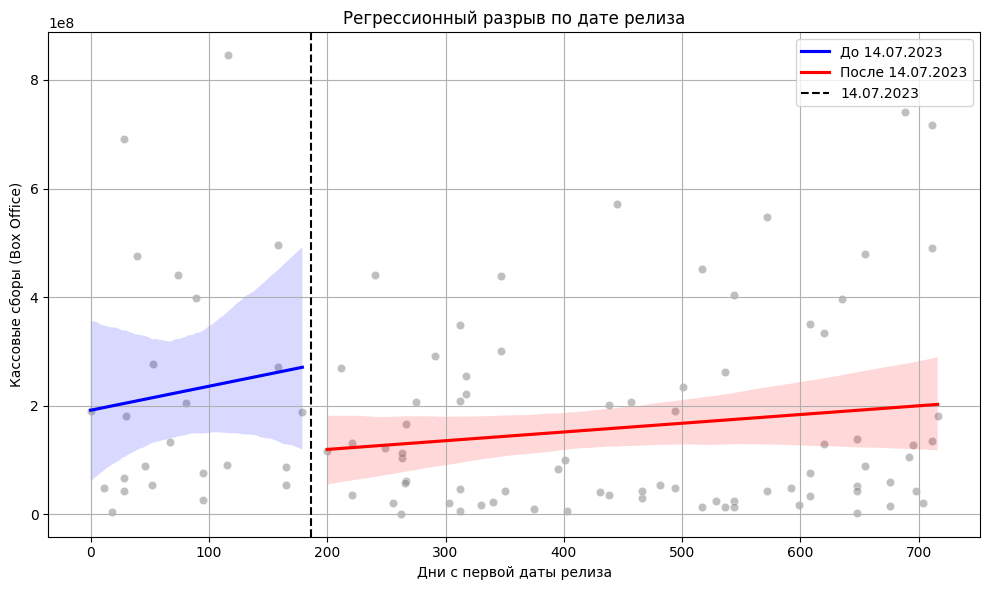

In [ ]:


# Преобразуем 'reliase date' в datetime
df_clean['reliase date'] = pd.to_datetime(df_clean['reliase date'], format='%d.%m.%y', errors='coerce')

# Преобразуем дату в числовой формат (дни с начала наблюдений)
df_clean['reliase date num'] = (df_clean['reliase date'] - df_clean['reliase date'].min()).dt.days

# Преобразуем box_office в числовой тип
df_clean['box_office'] = pd.to_numeric(df_clean['box_office'], errors='coerce')

# Устанавливаем дату разрыва
cutoff = pd.to_datetime('14.07.2023', format='%d.%m.%Y')

# Делим данные на две части: до и после cutoff
df_left = df_clean[df_clean['reliase date'] < cutoff]
df_right = df_clean[df_clean['reliase date'] >= cutoff]

# Строим график
plt.figure(figsize=(10, 6))

# Все точки
sns.scatterplot(x='reliase date num', y='box_office', data=df_clean, color='gray', alpha=0.5)

# Регрессия до cutoff
sns.regplot(x='reliase date num', y='box_office', data=df_left, scatter=False, color='blue', label='До 14.07.2023')

# Регрессия после cutoff
sns.regplot(x='reliase date num', y='box_office', data=df_right, scatter=False, color='red', label='После 14.07.2023')

# Вертикальная линия cutoff
cutoff_num = (cutoff - df_clean['reliase date'].min()).days
plt.axvline(x=cutoff_num, color='black', linestyle='--', label='14.07.2023')

# Оформление графика
plt.xlabel('Дни с первой даты релиза')
plt.ylabel('Кассовые сборы (Box Office)')
plt.title('Регрессионный разрыв по дате релиза')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Placebo тест с bootstrap: 100%|██████████| 18/18 [00:13<00:00,  1.35it/s]


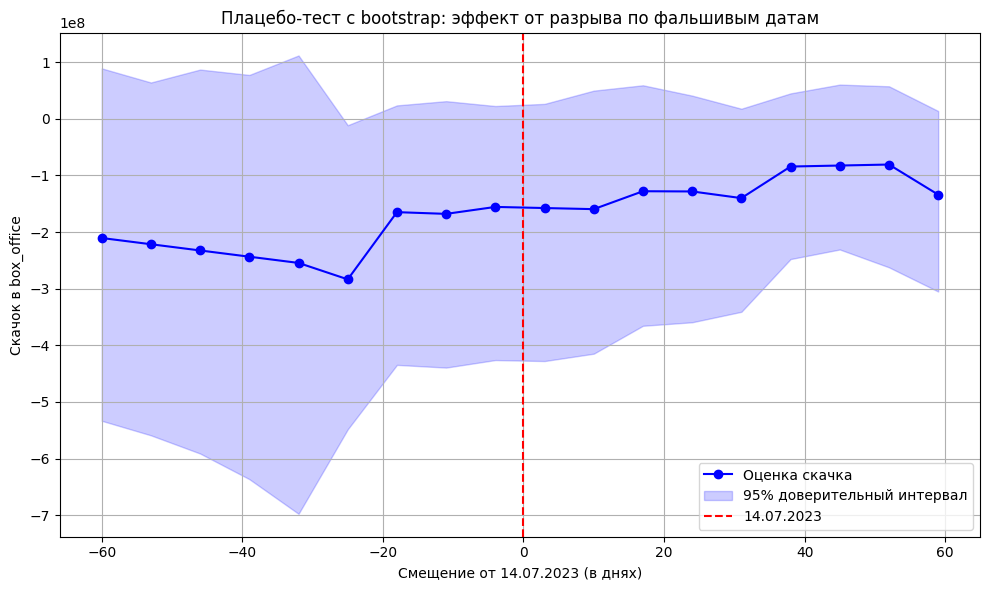

In [ ]:

from tqdm import tqdm

# Подготовка данных
df_clean['reliase date'] = pd.to_datetime(df_clean['reliase date'], format='%d.%m.%y', errors='coerce')
df_clean['reliase date num'] = (df_clean['reliase date'] - df_clean['reliase date'].min()).dt.days
df_clean['box_office'] = pd.to_numeric(df_clean['box_office'], errors='coerce')

# Настройки
cutoff_real = pd.to_datetime('14.07.2023', format='%d.%m.%Y')
placebo_offsets = np.arange(-60, 61, 7)
cutoff_dates = [cutoff_real + pd.Timedelta(days=int(d)) for d in placebo_offsets]

# Списки для результатов
jumps = []
conf_lowers = []
conf_uppers = []

# Bootstrap параметры
n_bootstrap = 500
conf_level = 0.95

# Основной цикл
for fake_cutoff in tqdm(cutoff_dates, desc='Placebo тест с bootstrap'):
    fake_cutoff_num = (fake_cutoff - df_clean['reliase date'].min()).days
    left = df_clean[df_clean['reliase date'] < fake_cutoff]
    right = df_clean[df_clean['reliase date'] >= fake_cutoff]

    if len(left) > 10 and len(right) > 10:
        # Оценка на полной выборке
        model_left = np.polyfit(left['reliase date num'], left['box_office'], 1)
        model_right = np.polyfit(right['reliase date num'], right['box_office'], 1)
        y_left = np.polyval(model_left, fake_cutoff_num)
        y_right = np.polyval(model_right, fake_cutoff_num)
        jump = y_right - y_left
        jumps.append(jump)

        # Bootstrap
        boot_jumps = []
        for _ in range(n_bootstrap):
            boot_left = left.sample(frac=1, replace=True)
            boot_right = right.sample(frac=1, replace=True)
            try:
                b_left = np.polyfit(boot_left['reliase date num'], boot_left['box_office'], 1)
                b_right = np.polyfit(boot_right['reliase date num'], boot_right['box_office'], 1)
                y_l = np.polyval(b_left, fake_cutoff_num)
                y_r = np.polyval(b_right, fake_cutoff_num)
                boot_jumps.append(y_r - y_l)
            except:
                continue
        # Доверительный интервал
        ci_lower = np.percentile(boot_jumps, (1 - conf_level) / 2 * 100)
        ci_upper = np.percentile(boot_jumps, (1 + conf_level) / 2 * 100)
        conf_lowers.append(ci_lower)
        conf_uppers.append(ci_upper)
    else:
        jumps.append(np.nan)
        conf_lowers.append(np.nan)
        conf_uppers.append(np.nan)

# Визуализация
plt.figure(figsize=(10, 6))
offsets = placebo_offsets
jumps = np.array(jumps)
conf_lowers = np.array(conf_lowers)
conf_uppers = np.array(conf_uppers)

# Основная линия
plt.plot(offsets, jumps, label='Оценка скачка', color='blue', marker='o')
plt.fill_between(offsets, conf_lowers, conf_uppers, color='blue', alpha=0.2, label='95% доверительный интервал')

# Вертикальная линия настоящего cutoff
plt.axvline(0, color='red', linestyle='--', label='14.07.2023')

# График
plt.title('Плацебо-тест с bootstrap: эффект от разрыва по фальшивым датам')
plt.xlabel('Смещение от 14.07.2023 (в днях)')
plt.ylabel('Скачок в box_office')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Построение квантильной регрессии

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def find_optimal_bins(feature, target, max_bins=10):
    results = []
    for n_bins in range(2, max_bins + 1):
        # Дискретизация признака
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
        X_binned = discretizer.fit_transform(feature.values.reshape(-1, 1))

        # Построение модели
        X = sm.add_constant(X_binned)
        model = sm.OLS(target, X).fit()

        # Запись результатов
        results.append({
            'n_bins': n_bins,
            'AIC': model.aic,
            'BIC': model.bic,
            'R2_adj': model.rsquared_adj
        })

    return pd.DataFrame(results)

results = find_optimal_bins(df['budget'], df['box_office'])
print(results.sort_values('AIC'))

   n_bins          AIC          BIC    R2_adj
7       9  4995.359276  5000.934259  0.354564
4       6  4995.425242  5001.000226  0.354209
1       3  4996.200542  5001.775526  0.350023
6       8  4996.202445  5001.777428  0.350013
3       5  4997.663881  5003.238864  0.342048
8      10  4999.568652  5005.143635  0.331521
2       4  5000.668891  5006.243874  0.325364
5       7  5001.104105  5006.679089  0.322913
0       2  5001.557286  5007.132269  0.320351


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# X (признаки) - 2D-массив, y (целевая переменная) - 1D-массив
X = df[['budget', 'FilmCritics', 'ratingKinopoisk', 'Length', 'sequel',
        'season', 'SJW', 'star_power', 'action movie', 'comedy', 'drama']]
y = df['box_office'].values  # Преобразуем в 1D numpy array

# Инициализация и обучение дерева
tree = DecisionTreeRegressor(
    max_leaf_nodes=5,
    min_samples_split=20,  # Минимум 20 наблюдений для разбиения
    min_samples_leaf=10    # Минимум 10 наблюдений в листе
)
tree.fit(X, y)  # Теперь X - 2D, y - 1D

# Извлечение границ разбиения
thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold != -2])
print(f"Оптимальные границы кантилей: {thresholds}")

Оптимальные границы кантилей: [5.00000000e-01 6.54999995e+00 6.60000000e+07 8.25000000e+07]


Первую границу не учитываем, так как минимальное значение кассовых сборов больше

In [ ]:
from statsmodels.regression.quantile_regression import QuantReg

# Заданные границы
bins = [-np.inf, 6.54999995e+00, 6.60000000e+07, 8.25000000e+07, np.inf]
labels = ['low', 'medium', 'high', 'premium']
df['box_office_group'] = pd.cut(df['box_office'], bins=bins, labels=labels)

# Проверка распределения
print(df['box_office_group'].value_counts())

box_office_group
premium    73
medium     44
high        3
low         0
Name: count, dtype: int64


После оценки было понятно, что данных в высокой группе не хватает, поэтому было принято решение сделать регрессию по трем квантилям.

In [ ]:
# Предикторы
X = df[['budget', 'FilmCritics', 'ratingKinopoisk', 'Length', 'sequel',
        'season', 'SJW', 'star_power', 'action movie', 'comedy', 'drama']]
X = sm.add_constant(X)  # Добавляем константу

# Квантили для анализа
quantiles = [0.15, 0.5, 0.85]  # 15%, 50% (медиана), 85%
y = df['box_office']
for q in quantiles:
    print(f"\n=== Квантильная регрессия для q = {q} ===")
    model = QuantReg(y, X).fit(q=q)
    print(model.summary())


=== Квантильная регрессия для q = 0.15 ===
                         QuantReg Regression Results                          
Dep. Variable:             box_office   Pseudo R-squared:               0.1461
Model:                       QuantReg   Bandwidth:                   1.617e+08
Method:                 Least Squares   Sparsity:                    3.743e+08
Date:                Thu, 08 May 2025   No. Observations:                  120
Time:                        16:31:23   Df Residuals:                      108
                                        Df Model:                           11
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -684.5462   1479.479     -0.463      0.645   -3617.131    2248.038
budget              0.9741      0.167      5.832      0.000       0.643       1.305
FilmCritics     -4158.9471   9564.556     -0.435      0.665   -2.31

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


<ipython-input-75-28c3f2eefd85>:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached

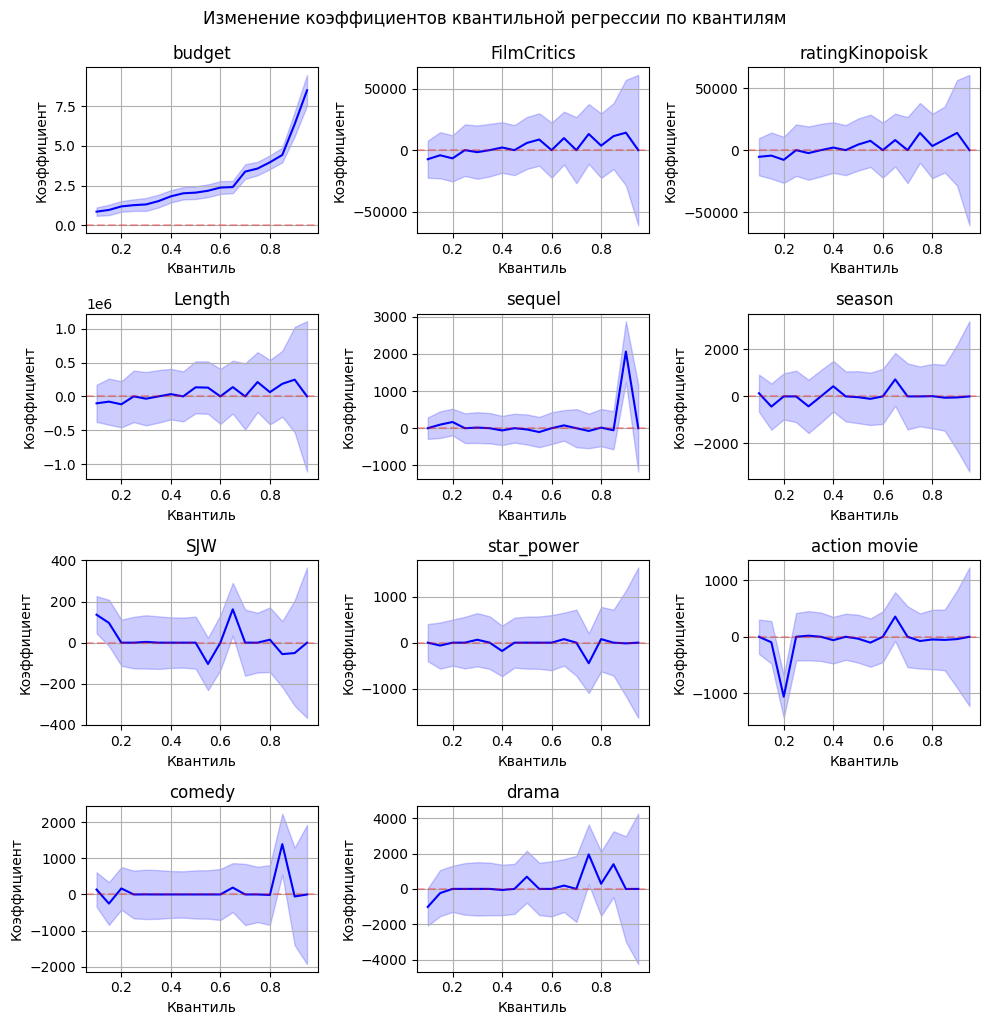


Сводная таблица коэффициентов по квантилям:
quantile                 0.10          0.15          0.20          0.25  \
variable                                                                  
FilmCritics     -7.352914e+03  -4158.947121 -6.664063e+03  3.570333e-08   
Length          -1.024520e+05 -77341.639769 -1.168025e+05  6.057163e-07   
SJW              1.357879e+02     96.085668  3.246900e-08  6.374470e-09   
action movie    -1.419751e-08    -97.650991 -1.058721e+03  7.004474e-13   
budget           8.674874e-01      0.974135  1.195267e+00  1.274982e+00   
comedy           1.357879e+02   -251.952868  1.666506e+02  6.374545e-09   
const           -8.826213e+02   -684.546239 -1.058721e+03  6.375529e-09   
drama           -1.018409e+03   -237.237334  1.048290e-07  4.451715e-13   
ratingKinopoisk -5.356832e+03  -4406.074605 -7.822775e+03  3.761607e-08   
season           1.357879e+02   -434.391817 -1.721895e-08  5.490945e-13   
sequel          -7.293642e-09     95.522222  1.666506e+

In [ ]:
# Подготовка данных
X = df[['budget', 'FilmCritics', 'ratingKinopoisk', 'Length', 'sequel',
        'season', 'SJW', 'star_power', 'action movie', 'comedy', 'drama']]
X = sm.add_constant(X)  # Добавляем константу
y = df['box_office']

# Задаем диапазон квантилей для анализа
quantiles = np.arange(0.1, 0.96, 0.05)  # От 10% до 95% с шагом 5%

# Создаем DataFrame для хранения результатов
results = pd.DataFrame(columns=['quantile', 'variable', 'coef', 'std_err', 'p_value'])

# Запускаем квантильные регрессии для каждого квантиля
for q in quantiles:
    model = QuantReg(y, X).fit(q=q, max_iter=1000)
    temp_df = pd.DataFrame({
        'quantile': q,
        'variable': model.params.index,
        'coef': model.params.values,
        'std_err': model.bse.values,
        'p_value': model.pvalues.values
    })
    results = pd.concat([results, temp_df], ignore_index=True)

# Визуализация изменения коэффициентов по квантилям
plt.figure(figsize=(10, 10))
variables = X.columns.drop('const')  # Исключаем константу

for i, var in enumerate(variables):
    plt.subplot(4, 3, i+1)
    subset = results[results['variable'] == var]

    # Основная линия - коэффициенты
    plt.plot(subset['quantile'], subset['coef'], color='b', label='Коэффициент')

    # Доверительный интервал
    plt.fill_between(subset['quantile'],
                    subset['coef'] - 1.96*subset['std_err'],
                    subset['coef'] + 1.96*subset['std_err'],
                    color='b', alpha=0.2)

    # Горизонтальная линия на нуле для проверки значимости
    plt.axhline(0, color='r', linestyle='--', alpha=0.3)

    plt.title(var)
    plt.xlabel('Квантиль')
    plt.ylabel('Коэффициент')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Изменение коэффициентов квантильной регрессии по квантилям', y=1.02)
plt.show()

# Дополнительная таблица с итоговыми значениями
summary_table = results.pivot_table(index='variable',
                                   columns='quantile',
                                   values='coef')

print("\nСводная таблица коэффициентов по квантилям:")
print(summary_table)